# Stock Forecasting

Time Series is a collection of data points collected at constant time intervals.
It is time dependent. 
Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading and Handling Time Series in Pandas

In [69]:
# load the raw data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [70]:
# identify the data type
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


# Time Series Data Structure
3 types of structures are used with TS data:
    - DatetimeIndex (mostly used)
    - PeriodIndex
    - TimedeltaIndex
Why do we need to convert the time into datetime while working with TS data?
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.

We will make it to the DatetimeIndex format and put it as the index column.
Because when the ‘date’ column is the index column we will be able to resample it very easily. 

In [71]:
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


# Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. 
If your date format is in DatetimeIndex, it is very easy:

In [72]:
apple['2019']

/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [92]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [74]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [75]:
# Call the .corr() method on the apple dataset to view the relationships among the features of the dataset
apple.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999920,0.999916,0.999839,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999911,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.999913,0.998961,-0.361110
Close,0.999839,0.999911,0.999913,1.000000,0.999117,-0.359471
Adj Close,0.998900,0.999056,0.998961,0.999117,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.359471,-0.360740,1.000000


/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

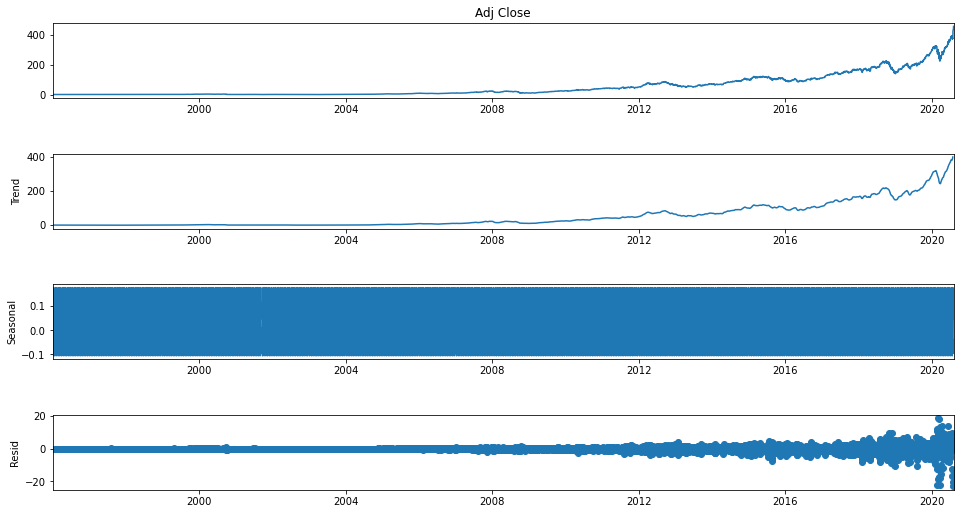

In [76]:
# Visualize the data to gain some insight
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple['Adj Close'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. 

In [77]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
#residual = decomposition.residual  
trend,seasonal

(Date
 1996-01-02   NaN
 1996-01-03   NaN
 1996-01-04   NaN
 1996-01-05   NaN
 1996-01-08   NaN
               ..
 2020-07-31   NaN
 2020-08-03   NaN
 2020-08-04   NaN
 2020-08-05   NaN
 2020-08-06   NaN
 Name: trend, Length: 6193, dtype: float64,
 Date
 1996-01-02   -0.051986
 1996-01-03    0.008759
 1996-01-04   -0.036232
 1996-01-05   -0.105675
 1996-01-08    0.114776
                 ...   
 2020-07-31   -0.026454
 2020-08-03   -0.096059
 2020-08-04   -0.044672
 2020-08-05   -0.040719
 2020-08-06   -0.051986
 Name: seasonal, Length: 6193, dtype: float64)

# How to Check Stationarity of our TS data?

We can check stationarity using the following:
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.

- Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [78]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

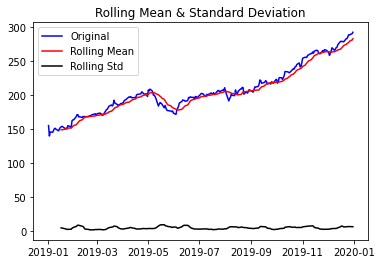

Results of Dickey-Fuller Test:
Test Statistic                   0.667945
p-value                          0.989176
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [86]:
test_stationarity(apple.loc['2019','Adj Close'])

# Plot the ACF and PACF charts and find the optimal parameters
The next step is to determine the tuning parameters of the model by looking at the autocorrelation and partial autocorrelation graphs.

# Build Model

# Make Predictions